<a href="https://colab.research.google.com/github/pattaradanai-lks/DADS5001/blob/main/6610412011_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [25]:
import yfinance as yf

tsm = yf.Ticker('TSM')
ibm = yf.Ticker('IBM')
interval = '1h'
start = '2023-09-01'
end = '2023-09-07'
df = tsm.history(interval=interval, start=start, end=end)
df2 = ibm.history(interval=interval, start=start, end=end)


In [26]:
df = yf.download('TSM', start='2021-07-01', end='2023-12-10')
df = df.dropna()
df = df.iloc[:,:4]

df2 = yf.download('IBM', start='2021-07-01', end='2023-12-10')
df2 = df2.dropna()
df2 = df2.iloc[:,:4]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [27]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4528    0  4528    0     0  12866      0 --:--:-- --:--:-- --:--:-- 12900
100  517k  100  517k    0     0   517k      0 --:--:-- --:--:-- --:--:-- 2883k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4556    0  4556    0     0    981      0 --:--:--  0:00:04 --:--:--   981
100  392k  100  392k    0     0  75344      0  0:00:05  0:00:05 --:--:--  878k


In [28]:
# Data Manipulation
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [29]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [30]:

# ดึงข้อมูลการซื้อขายของ IBM ในช่วงเวลาที่ตรงกับ X
df_ibm = yf.download('IBM', start='2021-07-28', end='2023-12-10')
df_ibm = df_ibm.dropna()

# คำนวณ RSI ของ IBM
#df_ibm['RSI_IBM'] = ta.RSI(np.array(df_ibm['Close']), timeperiod=10)
df_ibm['S_10'] = df_ibm['Close'].rolling(window=10).mean()
df_ibm['Corr_IBM'] = df_ibm['Close'].rolling(window=10).corr(df_ibm['S_10'])

# เลือกเฉพาะคอลัมน์ที่ต้องการจะนำมาใช้
df_ibm = df_ibm[['Corr_IBM']]

# รวม DataFrame X และ RSI ของ IBM เข้าด้วยกัน
X2 = pd.concat([X, df_ibm], axis=1)

# แทน NaN ในคอลัมน์ 'RSI_IBM' ด้วย 0
X2['Corr_IBM'] = X2['Corr_IBM'].fillna(0)

[*********************100%%**********************]  1 of 1 completed


In [31]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
split = int(0.8*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
# สร้างตัวแปรตามโค้ดก่อนหน้า
y2 = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
split2 = int(0.8 * len(df))
X_train2, X_test2, y_train2, y_test2 = X2[:split2], X2[split2:], y2[:split2], y2[split2:]

# ทำ Standardization ของข้อมูล
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

# สร้างและฝึกโมเดล
model2 = LogisticRegression()
model2.fit(X_train_scaled2, y_train2)


LogisticRegression()

In [33]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.37417389892088704]
1,High,[0.02403925660728819]
2,Low,[0.2770935945598492]
3,Close,[0.30258984869712924]
4,S_10,[-0.20348492934710757]
5,Corr,[-0.09071863294314779]
6,RSI,[-0.053489740872011644]
7,Open-Close,[0.2190563987185024]
8,Open-Open,[-0.19489005883739724]


In [34]:
pd.DataFrame(zip(X2.columns, np.transpose(model2.coef_)))

,0,1
0,Open,[-0.3689774247430409]
1,High,[0.004579691984520294]
2,Low,[0.3054735014776144]
3,Close,[0.2992964621226188]
4,S_10,[-0.2188831186122158]
5,Corr,[-0.09400843418501215]
6,RSI,[-0.048593389201683955]
7,Open-Close,[0.2205472314166508]
8,Open-Open,[-0.20252075948992157]
9,Corr_IBM,[-0.08737305322640829]


In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

probability = model.predict_proba(X_test)
print(probability)

[[0.78756201 0.21243799]
 [0.57502246 0.42497754]
 [0.77406352 0.22593648]
 [0.81550521 0.18449479]
 [0.59273028 0.40726972]
 [0.67779082 0.32220918]
 [0.71494099 0.28505901]
 [0.62849827 0.37150173]
 [0.52232362 0.47767638]
 [0.6403894  0.3596106 ]
 [0.59268003 0.40731997]
 [0.54048631 0.45951369]
 [0.66382757 0.33617243]
 [0.6796521  0.3203479 ]
 [0.43532946 0.56467054]
 [0.70146938 0.29853062]
 [0.64675959 0.35324041]
 [0.65662401 0.34337599]
 [0.68105227 0.31894773]
 [0.62932001 0.37067999]
 [0.6926081  0.3073919 ]
 [0.68292041 0.31707959]
 [0.57772477 0.42227523]
 [0.628682   0.371318  ]
 [0.67892588 0.32107412]
 [0.73775889 0.26224111]
 [0.42766378 0.57233622]
 [0.61050947 0.38949053]
 [0.58382936 0.41617064]
 [0.67025536 0.32974464]
 [0.45418656 0.54581344]
 [0.52317584 0.47682416]
 [0.67376397 0.32623603]
 [0.61447115 0.38552885]
 [0.66620972 0.33379028]
 [0.50268077 0.49731923]
 [0.63217357 0.36782643]
 [0.4306466  0.5693534 ]
 [0.65748825 0.34251175]
 [0.44432293 0.55567707]


In [36]:
probability2 = model2.predict_proba(X_test_scaled2)
print(probability2)

[[0.54187953 0.45812047]
 [0.45675386 0.54324614]
 [0.51684126 0.48315874]
 [0.45445693 0.54554307]
 [0.3864873  0.6135127 ]
 [0.50405936 0.49594064]
 [0.50314964 0.49685036]
 [0.48858302 0.51141698]
 [0.4622414  0.5377586 ]
 [0.51604906 0.48395094]
 [0.49116041 0.50883959]
 [0.48367042 0.51632958]
 [0.51258965 0.48741035]
 [0.47029046 0.52970954]
 [0.44343676 0.55656324]
 [0.5387585  0.4612415 ]
 [0.54698035 0.45301965]
 [0.54240051 0.45759949]
 [0.57454425 0.42545575]
 [0.54204925 0.45795075]
 [0.58844252 0.41155748]
 [0.52452475 0.47547525]
 [0.51023004 0.48976996]
 [0.5265902  0.4734098 ]
 [0.56566829 0.43433171]
 [0.53153645 0.46846355]
 [0.48219048 0.51780952]
 [0.57895187 0.42104813]
 [0.53703649 0.46296351]
 [0.54544663 0.45455337]
 [0.52673103 0.47326897]
 [0.56599088 0.43400912]
 [0.59135853 0.40864147]
 [0.58762649 0.41237351]
 [0.5395233  0.4604767 ]
 [0.48552847 0.51447153]
 [0.5432826  0.4567174 ]
 [0.49536451 0.50463549]
 [0.56254341 0.43745659]
 [0.50468362 0.49531638]


In [37]:
predicted = model.predict(X_test)
print(metrics.confusion_matrix(y_test, predicted))

[[54  9]
 [52  5]]


In [38]:
predicted2 = model2.predict(X_test_scaled2)
conf_matrix2 = metrics.confusion_matrix(y_test2, predicted2)
print(conf_matrix2)


[[46 17]
 [46 11]]


In [39]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.51      0.86      0.64        63
           1       0.36      0.09      0.14        57

    accuracy                           0.49       120
   macro avg       0.43      0.47      0.39       120
weighted avg       0.44      0.49      0.40       120



In [40]:
print(metrics.classification_report(y_test2, predicted2))

              precision    recall  f1-score   support

          -1       0.50      0.73      0.59        63
           1       0.39      0.19      0.26        57

    accuracy                           0.48       120
   macro avg       0.45      0.46      0.43       120
weighted avg       0.45      0.47      0.43       120



In [41]:
print(model.score(X_test,y_test))

0.49166666666666664


In [42]:
print(model2.score(X_test_scaled2, y_test2))

0.475


In [43]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.51666667 0.4        0.48333333 0.5        0.46666667 0.48333333
 0.51666667 0.55932203 0.52542373 0.42372881]
0.4875141242937853


In [44]:
cross_val2 = cross_val_score(LogisticRegression(), X2, y, scoring='accuracy', cv=10)
print(cross_val2)
print(cross_val2.mean())


[0.6        0.41666667 0.51666667 0.41666667 0.55       0.56666667
 0.48333333 0.57627119 0.57627119 0.45762712]
0.5160169491525424


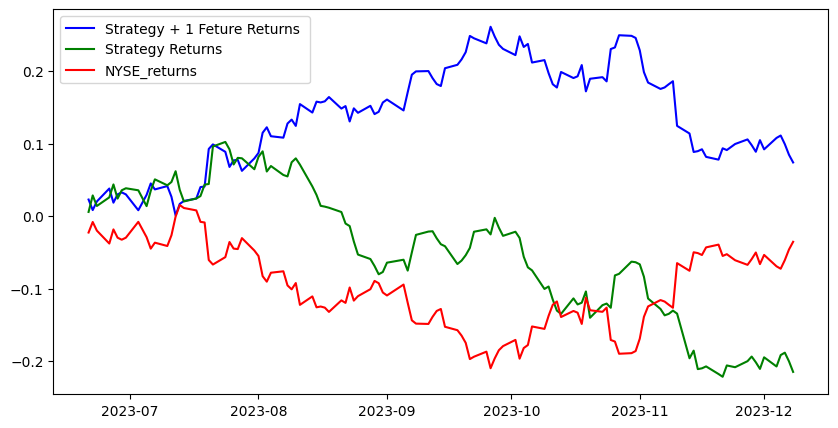

In [46]:
df['NYSE_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_NYSE_returns = np.cumsum(df[split:]['NYSE_returns'])

# ทำนายสัญญาณบน X
df['Predicted_Signal'] = model.predict(X)

# ทำนายสัญญาณบน X2
df['Predicted_Signal_X2'] = model2.predict(X2)


# คำนวณผลลัพธ์รายวันของกลยุทธ์
df['Strategy_returns'] = df['NYSE_returns'].shift(1) * df['Predicted_Signal']

df['Strategy_returns_X2'] = df['NYSE_returns'] * df['Predicted_Signal_X2'].shift(1)

Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
Cumulative_Strategy_returns_X2 = np.cumsum(df[split:]['Strategy_returns_X2'])

# แสดงผลลัพธ์
plt.figure(figsize=(10, 5))
plt.plot(Cumulative_Strategy_returns_X2, color='b', label='Strategy + 1 Feture Returns ')
plt.plot(Cumulative_Strategy_returns, color='g', label='Strategy Returns')
plt.plot(Cumulative_NYSE_returns, color='r', label='NYSE_returns')
plt.legend()
plt.show()
